# Custom Dataset

* [Creating a Custom Dataset for your files
](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files)

A custom Dataset class must implement three functions: ```__init__```, ```__len__```, and ```__getitem__```. 

In [26]:
import os
from pathlib import Path
import requests
import pickle
import gzip
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision.io import read_image

In [9]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# MNIST Custom Dataset

In [52]:
class CustomMNISTDataset(Dataset):
    def __init__(self, split: str = "train"):
        DATA_PATH = Path("data")
        PATH = DATA_PATH / "mnist"
        
        PATH.mkdir(parents=True, exist_ok=True)
        
        URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
        FILENAME = "mnist.pkl.gz"
        
        if not (PATH / FILENAME).exists():
            content = requests.get(URL + FILENAME).content
            (PATH / FILENAME).open("wb").write(content)

        with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
            ((self.x_train, self.y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
            
        self.length: int = len(self.x_train)

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        print(type(self.y_train[idx]))
        return torch.from_numpy(self.x_train[idx]), torch.tensor(self.y_train[idx])
            

In [53]:
dataset = CustomMNISTDataset()

In [54]:
image, label = dataset[1]

<class 'numpy.int64'>


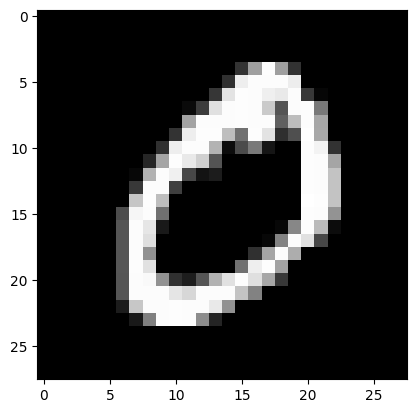

In [55]:
plt.imshow(image.reshape((28, 28)), cmap="gray")

In [56]:
label

tensor(0)

In [58]:
!rm -rf .data